In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
erasure_path = r'../scripts/results/export-bin-erasure'

erasure_clients = [pd.read_csv(f, header=None, delim_whitespace=True) 
                   for f in glob.glob(erasure_path + "/*Client.txt")]
erasure_control = [pd.read_csv(f, header=None, delim_whitespace=True) 
                   for f in glob.glob(erasure_path + "/*Controller.txt")]
erasure_servers = [pd.read_csv(f, header=None, delim_whitespace=True) 
                   for f in glob.glob(erasure_path + "/*ChunkServer.txt")]

In [3]:
replication_path = r'../scripts/results/export-bin-replication'

replication_clients = [pd.read_csv(f, header=None, delim_whitespace=True) 
                   for f in glob.glob(replication_path + "/*Client.txt")]
replication_control = [pd.read_csv(f, header=None, delim_whitespace=True) 
                   for f in glob.glob(replication_path + "/*Controller.txt")]
replication_servers = [pd.read_csv(f, header=None, delim_whitespace=True) 
                   for f in glob.glob(replication_path + "/*ChunkServer.txt")]

In [4]:
def averaged_chunk(df_list, column_index):
    x = np.array(df_list[0][column_index])
    for i in range(1, len(df_list)):
        n = np.array(df_list[i][column_index])
        x_s, n_s = x.shape[0], n.shape[0]
        if (n_s < x_s):
            x.resize(n_s)
        else:
            n.resize(x_s)
        x += n
    return x / len(df_list)

In [5]:
def polyfit(y):
    x = np.arange(len(y))
    p15 = np.poly1d(np.polyfit(x, y, 15))
    xp = np.linspace(0, len(y) - 1, 1000)
    
    return xp, p15

In [6]:
def plot(title, erasure_list, replication_list):
    plt.figure(figsize=(18,18))
    plt.subplot(2, 1, 1)  

    y_erasure_cpu = averaged_chunk(erasure_list, 8)
    xp, p15 = polyfit(y_erasure_cpu)
    plt.plot(xp, p15(xp), label='erasure')

    y_replication_cpu = averaged_chunk(replication_list, 8)
    xp, p15 = polyfit(y_replication_cpu)
    plt.plot(xp, p15(xp), label='replication')

    plt.title('Averaged Chunk Server CPU %')
    plt.legend(loc='best', fontsize='large')
    plt.xlabel('Time Sequence'), plt.ylabel('Percentage');

    plt.subplot(2, 1, 2)  
    y_erasure_mem = averaged_chunk(erasure_list, 9)
    plt.plot(y_erasure_mem, label='erasure')

    y_replication_mem = averaged_chunk(replication_list, 9)
    plt.plot(y_replication_mem, label='replication')

    plt.title(title + ' Memory %')
    plt.legend(loc='best', fontsize='large')
    plt.xlabel('Time Sequence'), plt.ylabel('Percentage');

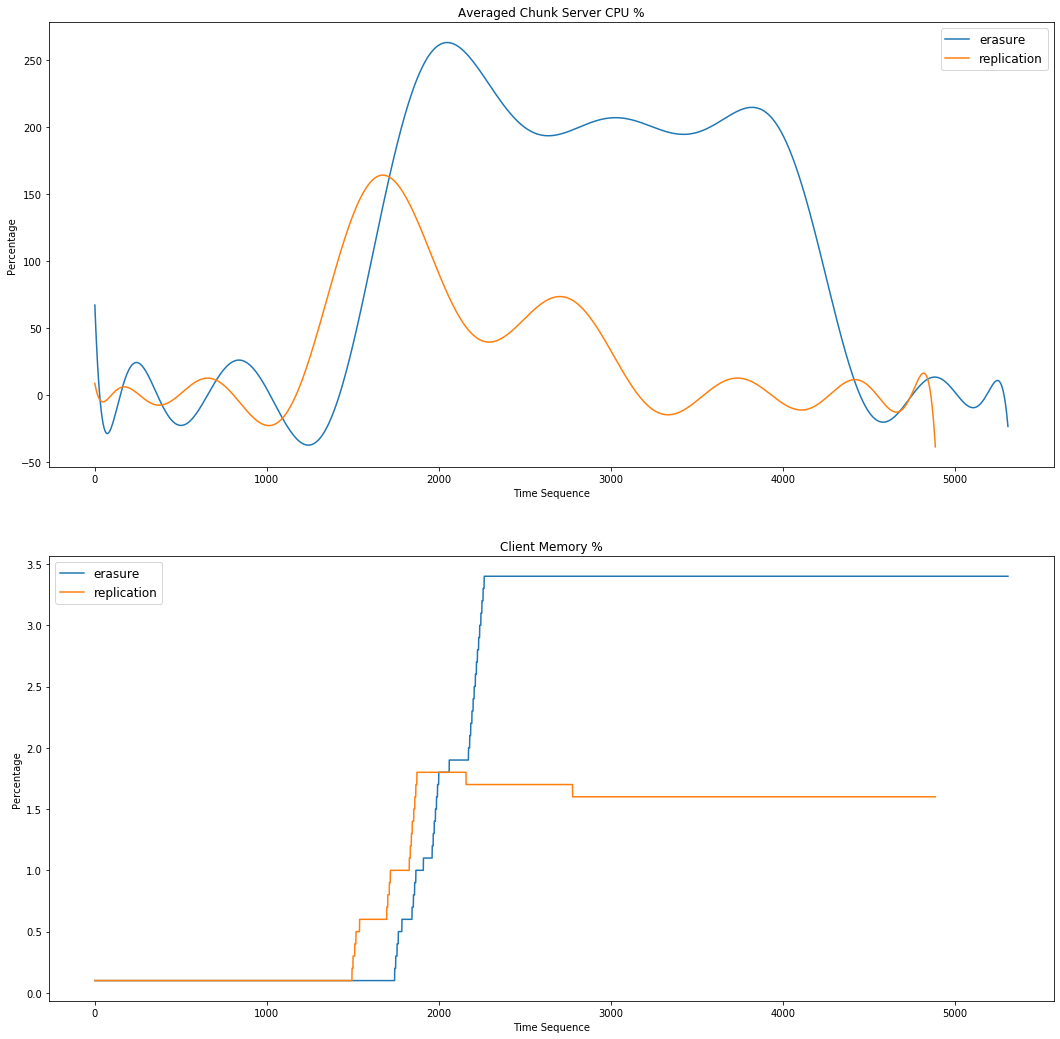

In [7]:
plot('Client', erasure_clients, replication_clients)

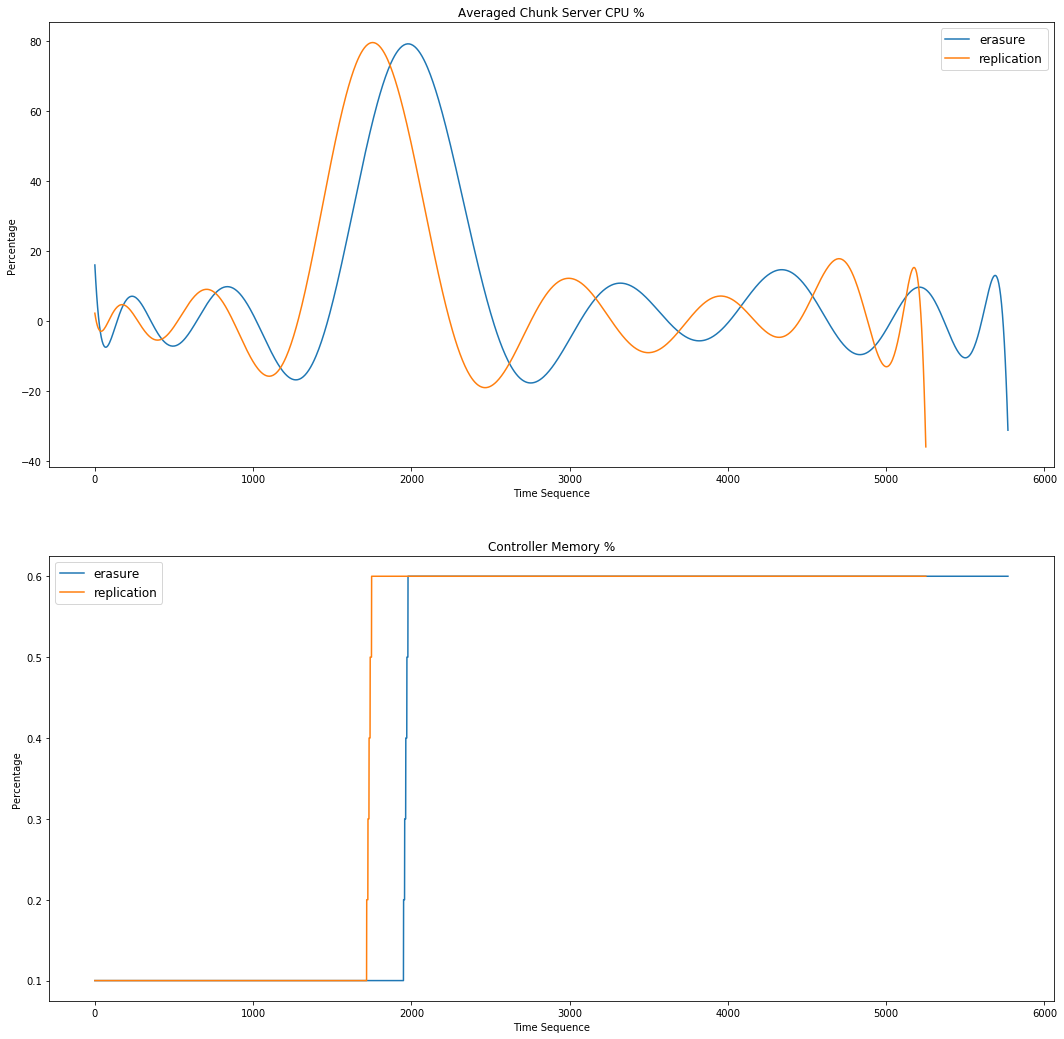

In [8]:
plot('Controller', erasure_control, replication_control)

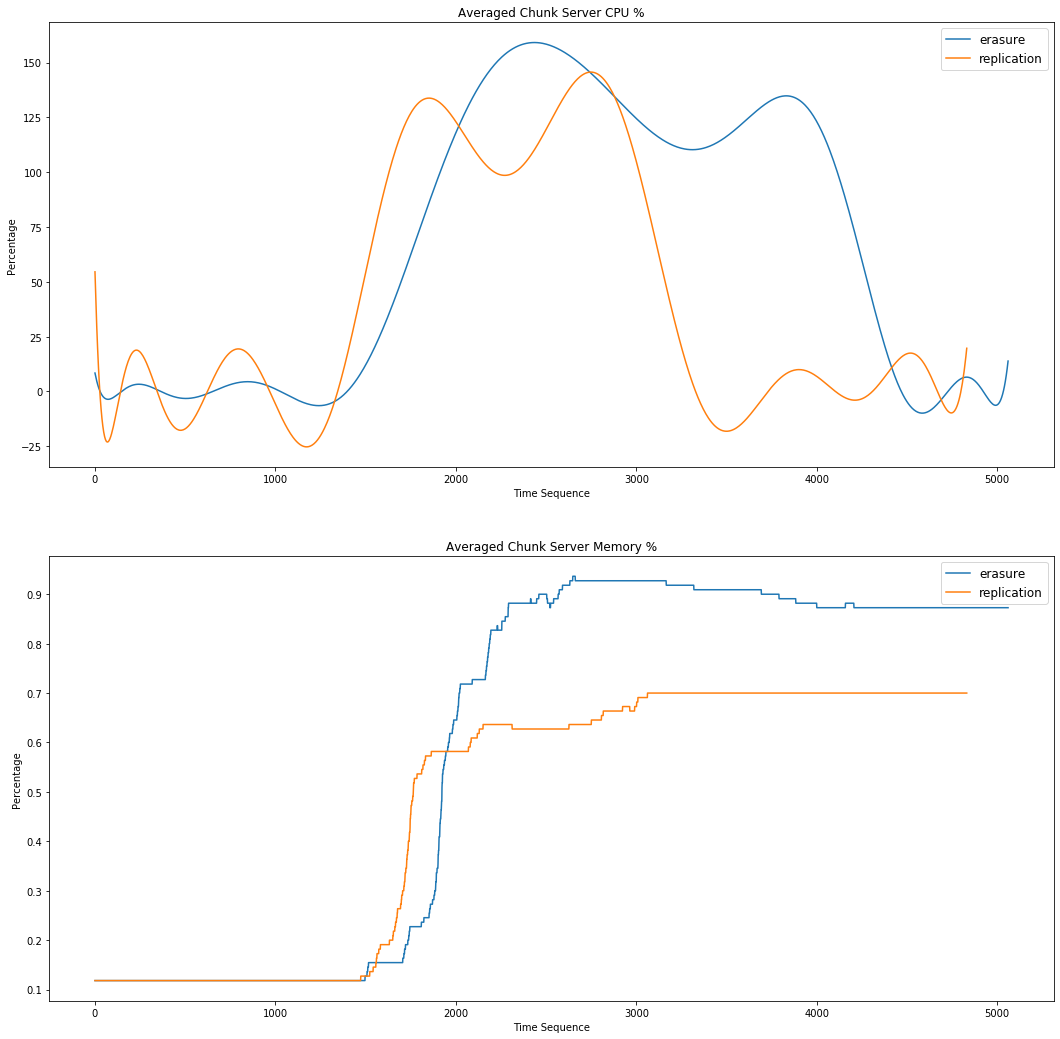

In [9]:
plot('Averaged Chunk Server', erasure_servers, replication_servers)